# AIML Module Project - Unsupervised Learning


Name: Nikhil Sharma

Email ID: nikhil.10.sharma@outlook.com

In [138]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
%matplotlib inline

1. Data Understanding & Exploration:

A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
df_car_names = pd.read_csv('Car name.csv')

In [3]:
print(df_car_names.shape)
df_car_names.head()

(398, 1)


,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [4]:
df_car_attributes = pd.read_json('Car-Attributes.json')

In [5]:
print(df_car_attributes.shape)
df_car_attributes.head()

(398, 8)


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


C. Merge both the DataFrames together to form a single DataFrame

In [6]:
df_merged = pd.concat([df_car_names, df_car_attributes], axis=1)

In [7]:
print(df_merged.shape)
df_merged.head()

(398, 9)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
df_merged.tail() 

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1
397,chevy s-10,31.0,4,119.0,82,2720,19.4,82,1


In [9]:
df_merged.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Column 'hp' is in object type, we will convert it into float after few steps.

In [10]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


Insights:
     
     1. The average fuel efficiency of the vehicles in the dataset is approximately 23.51 miles per gallon, with a standard deviation of 7.82. The minimum and maximum mpg are 9.0 and 46.6 respectively. The median mpg (50th percentile) is 23.0, indicating that half of the vehicles have an mpg less than or equal to 23.0.
     2. The mpg data is somewhat symmetrically distributed, as the mean is close to the median value of 23.0.
     3. The median number of cylinders is 4, suggesting that the most vehicles in the dataset have either 4 or 8 cylinders, with some having 3 or 6 cylinders.
     4. The average engine displacement is approximately 193.43. The majority of vehicles have smaller engine displacements, but there are some outliers with larger engine sizes.
     5. The average weight of the vehicles is approximately 2970.42. The majority of vehicles have weights between 2223.75 and 3608.0 pounds.
     6. The mean acceleration is about 15.57 seconds, majority of vehicles have accelerations between 13.825 and 17.175 seconds.
     7. The data includes model years ranging from 1970 to 1982, with an average manufacturing year of approximately 1976 and elatively even distribution across these years.  

2. Data Preparation & Analysis:

A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [11]:
(df_merged.isnull().sum() / len(df_merged)) * 100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

There are no missing values present in the data.

B. Check for duplicate values in the data and impute with the best suitable approach.

In [12]:
df_merged.duplicated().sum()

0

There are no duplicate values

C. Plot a pairplot for all features.

C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


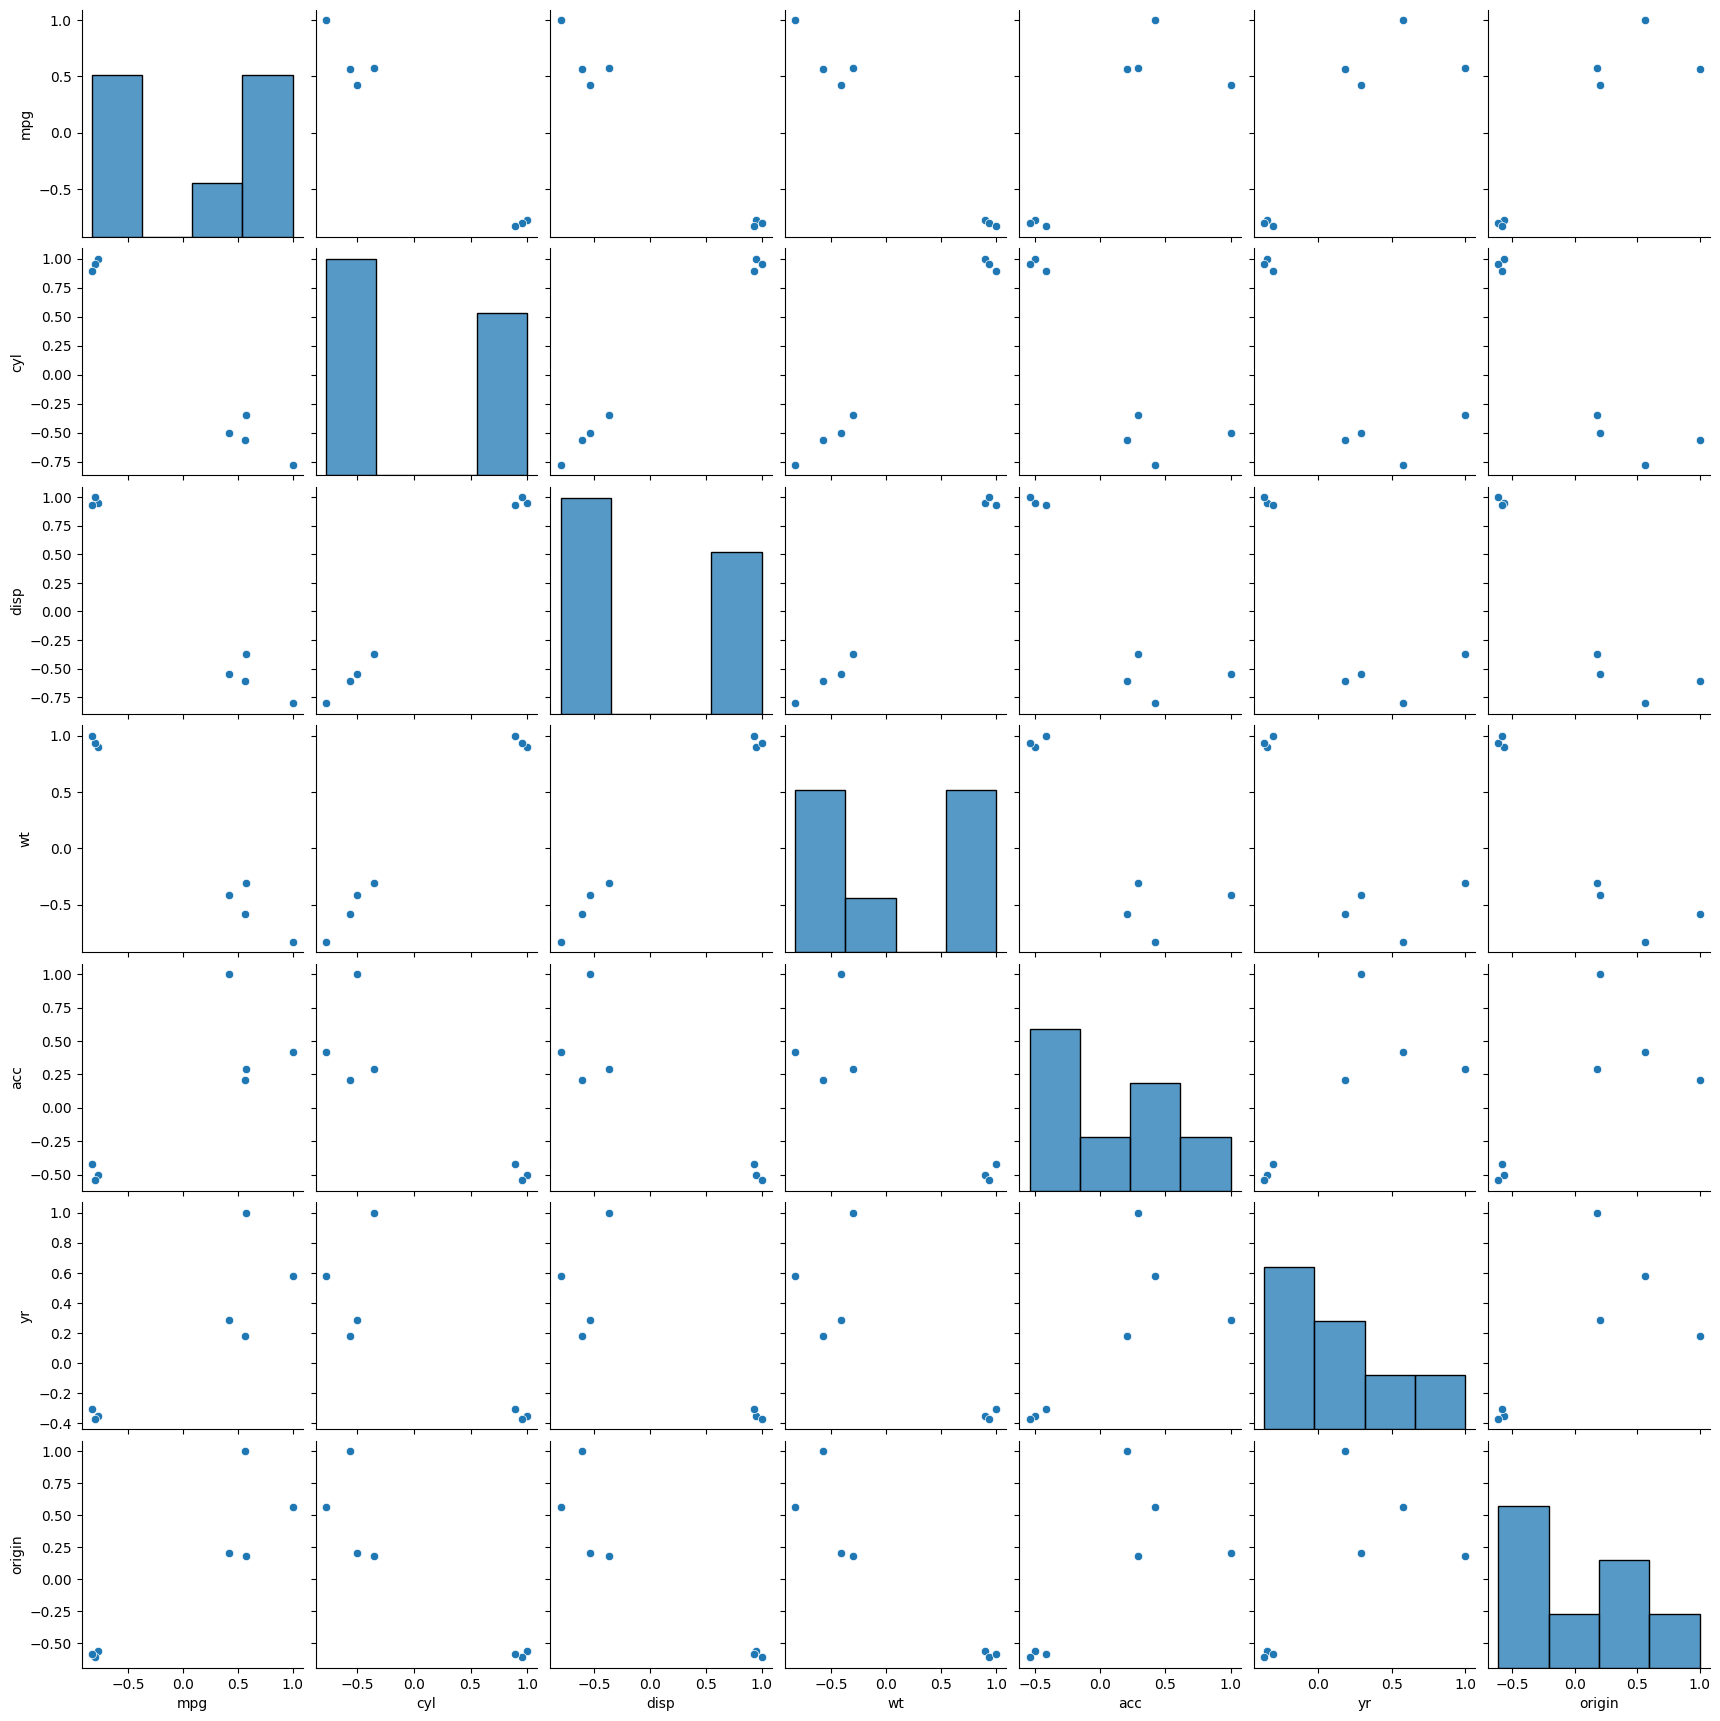

In [13]:
num_features = df_merged.drop('car_name', axis = 1)
num_features = num_features.drop('hp', axis=1)
sns.pairplot(data=num_features.corr());

D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

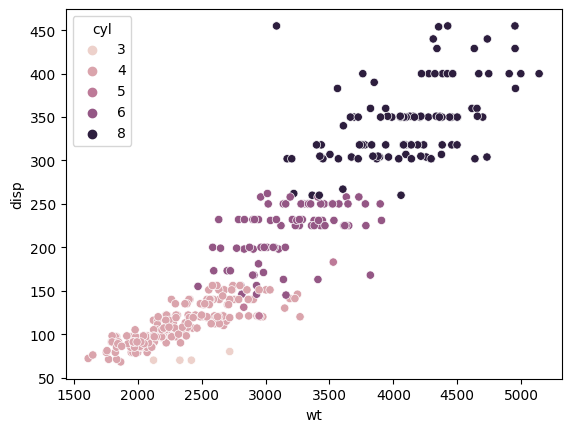

In [14]:
sns.scatterplot(data=df_merged, x='wt', y='disp', hue='cyl');

E.   Insights:

        1. Features 'disp' and 'wt' have a positive relationship.
        2. As the displacement increases, after certain point the number of cylinders also increases and so is the weight of the vehicles.

F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

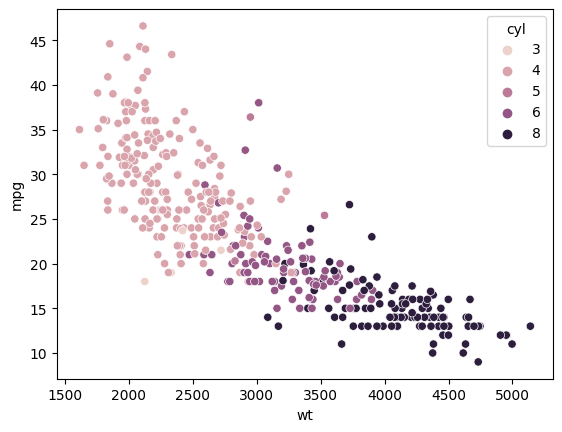

In [15]:
sns.scatterplot(data=df_merged, x='wt', y='mpg', hue='cyl');

G. Share insights for Q2.f.

Insights:

    1. Features 'mpg' and 'wt' have a negative relationship.
    2. As the number of cylinder increases resulting in increasing the weight of the car, the mpg of the vehicles decreases.

H. Check for unexpected values in all the features and datapoints with such values.
[Hint: ‘?’ is present in ‘hp’]

In [16]:
col = df_merged.drop('car_name', axis=1)
col= col.columns

for i in col:

    print(f"unique values in {i} is :", df_merged[i].unique())
    print('+'*85)

unique values in mpg is : [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
unique values in cyl is : [8 4 6 3 5]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
unique values in disp is : [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113

From above output we could see that there is '?' in 'hp' column. Lets see unique values of only hp column.

In [17]:
df_merged['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [18]:
rows = df_merged[df_merged['hp'] == '?']
df_merged[df_merged['hp'] == '?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [19]:
for index, row in rows.iterrows():
    car_name = row['car_name']

    # Find the corresponding row with the same 'car_name' and non-missing 'hp'
    corresponding_row = df_merged[(df_merged['car_name'] == car_name) & (df_merged['hp'] != '?')]
    if not corresponding_row.empty:
      print(corresponding_row)
    else:
      print(f"There are no corresponding hp values for {car_name}")

       car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
112  ford pinto  19.0    4  122.0  85  2310  18.5  73       1
130  ford pinto  26.0    4  122.0  80  2451  16.5  74       1
168  ford pinto  23.0    4  140.0  83  2639  17.0  75       1
174  ford pinto  18.0    6  171.0  97  2984  14.5  75       1
206  ford pinto  26.5    4  140.0  72  2565  13.6  76       1
          car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
17   ford maverick  21.0    6  200.0  85  2587  16.0  70       1
100  ford maverick  18.0    6  250.0  88  3021  16.5  73       1
155  ford maverick  15.0    6  250.0  72  3158  19.5  75       1
193  ford maverick  24.0    6  200.0  81  3012  17.6  76       1
There are no corresponding hp values for renault lecar deluxe
There are no corresponding hp values for ford mustang cobra
There are no corresponding hp values for renault 18i
There are no corresponding hp values for amc concord dl


In [20]:
df_merged[df_merged['hp'] == '?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


Usually we impute missing values in numeric data with the mean or the median of that feature, but here we can see that for 2 car names there are multiple enteries of the same car name(ford pinto and ford maverick ), so for ford pinto and ford maverick we are going to impute the mean of those multiple entries and for the rest of unexpected values ('?'), we will impute them with the mean of 'hp'.

In [21]:
ford_pinto_mean = np.mean([85, 80, 83, 72])
ford_pinto_mean

80.0

In [22]:
ford_maverick_mean = np.mean([85, 88, 72, 81])
ford_maverick_mean

81.5

In [23]:
pinto_enteries = (df_merged['hp'] == '?') & (df_merged['car_name'] == 'ford pinto')
df_merged[pinto_enteries]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1


In [24]:
df_merged.loc[pinto_enteries, 'hp'] = ford_pinto_mean

In [25]:
df_merged[pinto_enteries]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,80.0,2046,19.0,71,1


In [26]:
maverick_enteries = (df_merged['hp'] == '?') & (df_merged['car_name'] == 'ford maverick')
df_merged[maverick_enteries]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1


In [27]:
df_merged.loc[maverick_enteries, 'hp'] = ford_maverick_mean

In [28]:
df_merged[maverick_enteries]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
126,ford maverick,21.0,6,200.0,81.5,2875,17.0,74,1


In [29]:
df_merged[df_merged['hp'] == '?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


We can see from above results that the 'ford pinto' and 'ford maverick' is now removed from the list and we do not have unexpected '?' values now.

In [30]:
df_merged.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [31]:
hp_mean = pd.to_numeric(df_merged['hp'], errors='coerce').mean()
hp_mean

104.3489847715736

In [32]:
df_merged['hp'] = df_merged['hp'].replace('?', hp_mean)

In [33]:
df_merged[df_merged['hp'] == '?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


With above output it is clear that all the unexpected values ('?'), has been imputed now.

In [34]:
#let's check the data types again
df_merged.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

'hp' has been converted to float from object

# 3. Clustering:

A. Apply K-Means clustering for 2 to 10 clusters.

Before applying K-Means clustering, we have to standardize the data, lets apply Z-Score scaling on the data.

In [35]:
attr = df_merged.iloc[:,1:] # this will contain all the rows except car_name
df_scaled = attr.apply(zscore)
df_scaled

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.671703,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.588220,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.195427,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.195427,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.933565,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.480490,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,-1.370821,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,-0.532863,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,-0.663794,-0.408411,1.100822,1.621983,-0.715145


In [36]:
#Now lets apply K-Means clustering
clusters=range(2,11) # Specifying the number of clusters
meanDistortions=[] # Create an empty list

for k in clusters:
  model = KMeans(n_clusters=k)
  model.fit(df_scaled)
  prediction = model.predict(df_scaled)
  meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])

C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:

B. Plot a visual and find elbow point.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

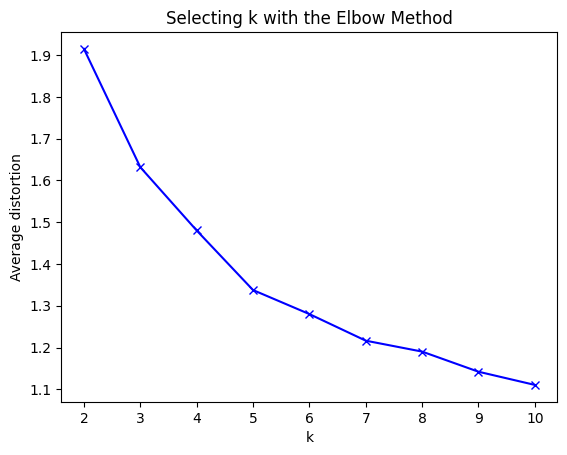

In [37]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

C. On the above visual, highlight which are the possible Elbow points.

From the  above graph, the possible Elbow point, appear to be at k=5. There is a huge dip in intertia when we jump from k=2 to k=3 and it keeps on dipping massively till k=5, after that there is a decrease in the dip. So the most appropriate Elbow point seems to be k=5, however we will also take a look at clusters k=4 and k=6.   

D. Train a K-means clustering model once again on the optimal number of clusters.

In [38]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(df_scaled)
prediction=final_model.predict(df_scaled)

C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [39]:
#Append the prediction 
df_merged["GROUP"] = prediction
print("Groups Assigned : \n")
df_merged.sample(5)

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
130,ford pinto,26.0,4,122.0,80.000000,2451,16.5,74,1,3
354,renault 18i,34.5,4,100.0,104.348985,2320,15.8,81,2,1
228,ford granada,18.5,6,250.0,98.000000,3525,19.0,77,1,2
68,buick lesabre custom,13.0,8,350.0,155.000000,4502,13.5,72,1,0
33,amc gremlin,19.0,6,232.0,100.000000,2634,13.0,71,1,2


In [40]:
# Analyze the distribution of the data among the groups (K = 4).
df_Clust = df_merged.drop(['car_name'], axis=1).groupby(['GROUP'])
df_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,14.469474,8.000000,349.705263,162.105263,4154.526316,12.604211,73.526316,1.000000
1,33.001818,4.090909,111.618182,76.388163,2307.372727,16.493636,80.145455,2.045455
2,19.937234,5.968085,221.212766,100.789340,3228.702128,16.585106,76.191489,1.042553
3,25.049495,4.040404,107.974747,83.373737,2325.656566,16.418182,73.626263,2.101010


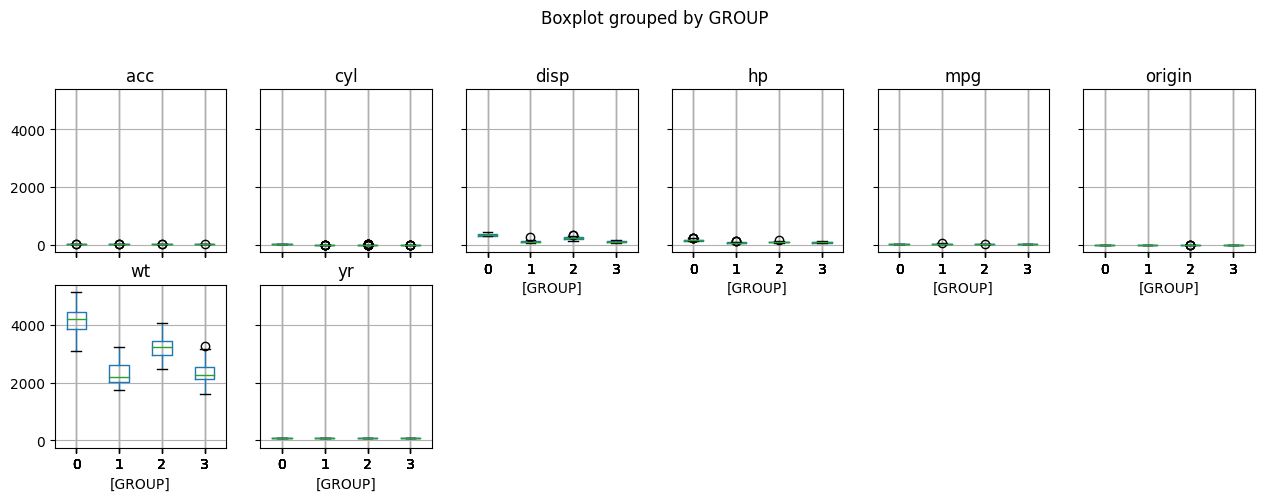

In [41]:
# visuaizing above results in boxplot
df_merged.boxplot(by='GROUP', layout=(4,6), figsize=(15,10));

In [42]:
# Calculating silhouette_score
labels = final_model.labels_
silhouette_score(df_scaled,labels)

0.312188857883808

In [43]:
# dropping Group column for trying further K values

df_merged.drop(['GROUP'], axis=1, inplace=True)
df_merged.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [44]:
# K = 5
final_model=KMeans(5)
final_model.fit(df_scaled)
prediction=final_model.predict(df_scaled)

C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [45]:
#Append the prediction 
df_merged["GROUP"] = prediction
print("Groups Assigned : \n")
df_merged.sample(5)

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
139,ford gran torino (sw),14.0,8,302.0,140.0,4638,16.0,74,1,3
273,datsun 200-sx,23.9,4,119.0,97.0,2405,14.9,78,3,2
79,renault 12 (sw),26.0,4,96.0,69.0,2189,18.0,72,2,4
258,buick century special,20.6,6,231.0,105.0,3380,15.8,78,1,0
296,amc spirit dl,27.4,4,121.0,80.0,2670,15.0,79,1,1


In [46]:
# Analyze the distribution of the data among the groups (K = 5).
df_Clust = df_merged.drop(['car_name'], axis=1).groupby(['GROUP'])
df_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,19.104938,6.222222,233.444444,101.734568,3298.580247,16.632099,75.703704,1.037037
1,28.791045,4.194030,132.567164,83.189522,2563.805970,16.549254,79.671642,1.074627
2,34.137500,4.083333,99.527778,73.176361,2155.819444,16.734722,79.416667,2.763889
3,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
4,24.619048,4.047619,108.601190,85.511905,2347.619048,16.107143,73.309524,2.107143


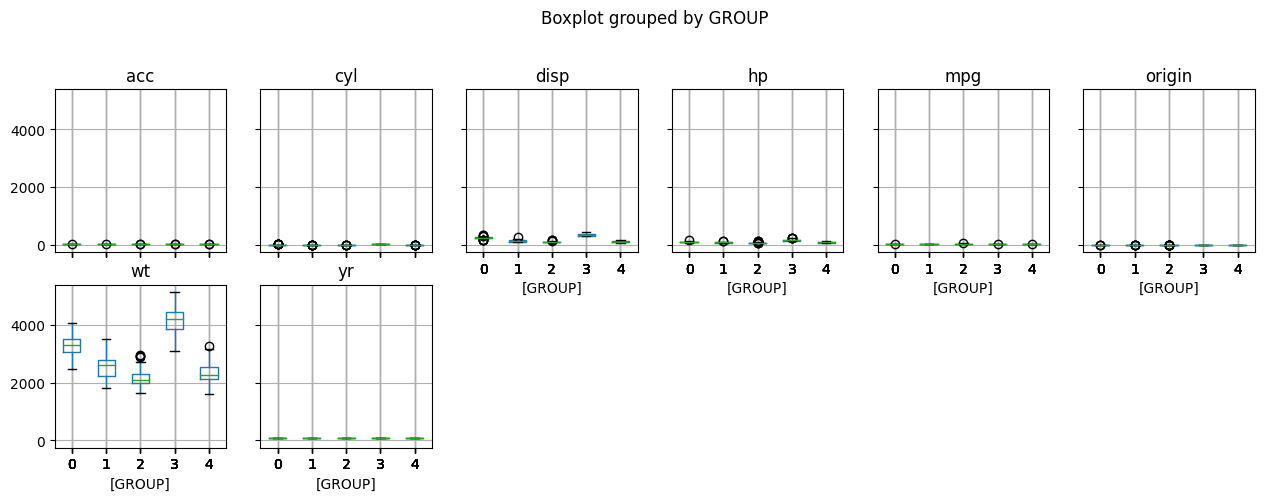

In [47]:
# visuaizing above results in boxplot
df_merged.boxplot(by='GROUP', layout=(4,6), figsize=(15,10));

In [48]:
# Calculating silhouette_score
labels = final_model.labels_
silhouette_score(df_scaled,labels)

0.3325284808608839

In [49]:
# dropping Group column for trying further K values

df_merged.drop(['GROUP'], axis=1, inplace=True)
df_merged.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [50]:
# K = 6
final_model=KMeans(6)
final_model.fit(df_scaled)
prediction=final_model.predict(df_scaled)

C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [51]:
#Append the prediction 
df_merged["GROUP"] = prediction
print("Groups Assigned : \n")
df_merged.sample(5)

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
40,ford galaxie 500,14.0,8,351.0,153.0,4154,13.5,71,1,1
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
113,mercury capri v6,21.0,6,155.0,107.0,2472,14.0,73,1,2
116,pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,1
292,chrysler lebaron town @ country (sw),18.5,8,360.0,150.0,3940,13.0,79,1,1


In [52]:
# Analyze the distribution of the data among the groups (K = 5).
df_Clust = df_merged.drop(['car_name'], axis=1).groupby(['GROUP'])
df_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,25.054545,4.136364,109.530303,91.409091,2387.545455,14.948485,74.530303,2.500000
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
2,19.181707,6.207317,232.829268,101.432927,3301.402439,16.674390,75.743902,1.048780
3,29.159649,4.175439,132.719298,85.099964,2521.578947,15.870175,80.000000,1.000000
4,34.895455,4.045455,98.500000,69.813606,2161.060606,17.268182,79.606061,2.696970
5,24.566667,4.000000,111.893939,74.454545,2325.030303,18.657576,72.787879,1.393939


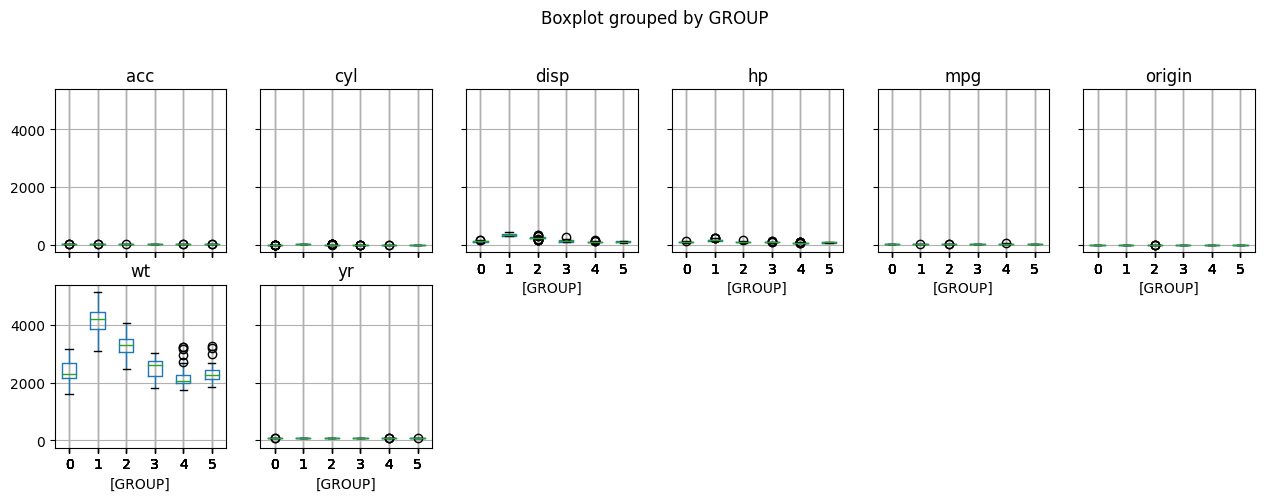

In [53]:
# visuaizing above results in boxplot
df_merged.boxplot(by='GROUP', layout=(4,6), figsize=(15,10));

In [54]:
# Calculating silhouette_score
labels = final_model.labels_
silhouette_score(df_scaled,labels)

0.3350793948935784

In [55]:
# Based on the silhouette score and Elbow Curve, the optimal number of clusters seems to be 5 (silhouette score for k =5 and
# =6 is almost same) so let's train the model again with k=5
optimal_k = 5
final_kmeans_model = KMeans(n_clusters=optimal_k)
final_kmeans_model.fit(df_scaled)

C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

In [56]:
# prediction 
prediction=final_kmeans_model.predict(df_scaled)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 2, 2, 2, 2, 0, 3, 0,
       3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 4, 2, 4, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 0, 3, 3, 4, 4, 3, 1, 1, 1, 1, 2, 2, 2, 2, 4, 4, 3,
       0, 2, 2, 2, 2, 3, 0, 0, 4, 3, 1, 3, 3, 2, 1, 1, 1, 1, 0, 4, 0, 4,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 3, 4, 0, 4, 4, 4, 0, 3, 3,
       3, 3, 0, 4, 0, 0, 0, 2, 1, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 4, 0, 0, 4, 3, 4, 4, 0, 3, 2, 3, 2, 0, 0, 2, 2, 4, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 0, 0, 4, 4, 4, 2, 4, 2,

E. Add a new feature in the DataFrame which will have labels based upon cluster value.

In [57]:
df_merged["GROUP"] = prediction
print("Groups Assigned : \n")
df_merged.sample(5)

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
231,chrysler cordoba,15.5,8,400.0,190.0,4325,12.2,77,1,1
370,pontiac j2000 se hatchback,31.0,4,112.0,85.0,2575,16.2,82,1,4
20,peugeot 504,25.0,4,110.0,87.0,2672,17.5,70,2,3
203,volkswagen rabbit,29.5,4,97.0,71.0,1825,12.2,76,2,3
246,mazda glc deluxe,32.8,4,78.0,52.0,1985,19.4,78,3,0


In [58]:
#count of data points in each cluster
print(df_merged['GROUP'].value_counts())

GROUP
1    94
3    84
2    81
0    72
4    67
Name: count, dtype: int64


In [59]:
# Also adding the cluster labels to scaled data
df_scaled['cluster_label/Group'] = final_kmeans_model.labels_
df_scaled.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster_label/Group
132,0.190289,-0.856321,-0.513026,-0.768538,-0.506545,0.519896,-0.544290,-0.715145,3
51,0.830809,-0.856321,-1.098783,-0.899469,-1.059883,1.427593,-1.356642,0.533222,3
21,0.062185,-0.856321,-0.829911,-0.375745,-0.638968,-0.387801,-1.627426,0.533222,3
28,-1.859374,1.498191,1.061796,2.321433,2.082789,1.064514,-1.627426,-0.715145,1
216,1.022965,-0.856321,-0.916334,-0.951842,-1.094171,1.064514,0.268063,1.781589,0


In [60]:
#count of data points in each cluster
print(df_scaled['cluster_label/Group'].value_counts())

cluster_label/Group
1    94
3    84
2    81
0    72
4    67
Name: count, dtype: int64


F. Plot a visual and color the datapoints based upon clusters.

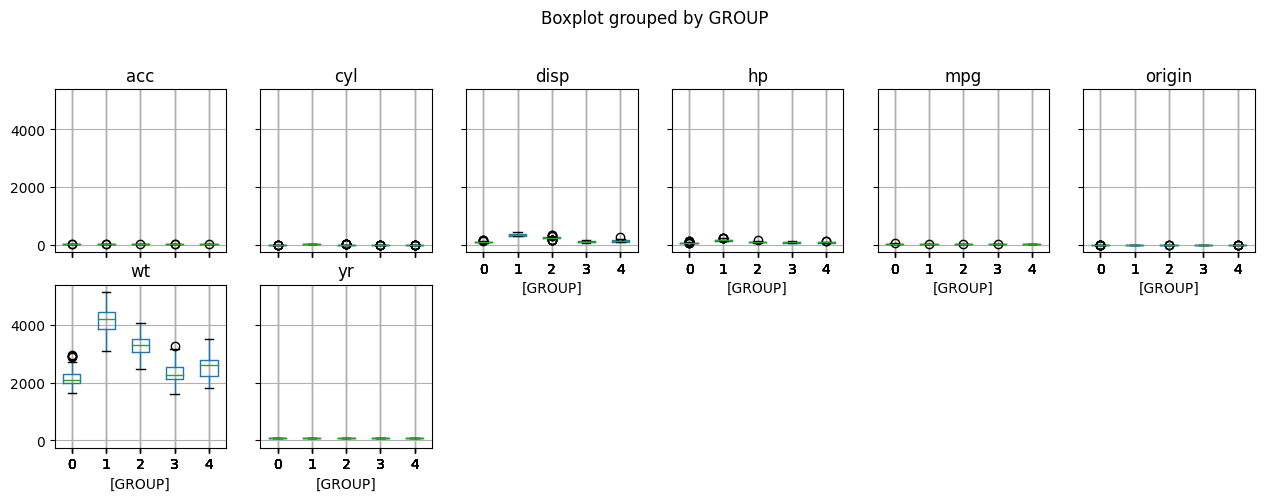

In [61]:
df_merged.boxplot(by='GROUP', layout=(4,6), figsize=(15,10));

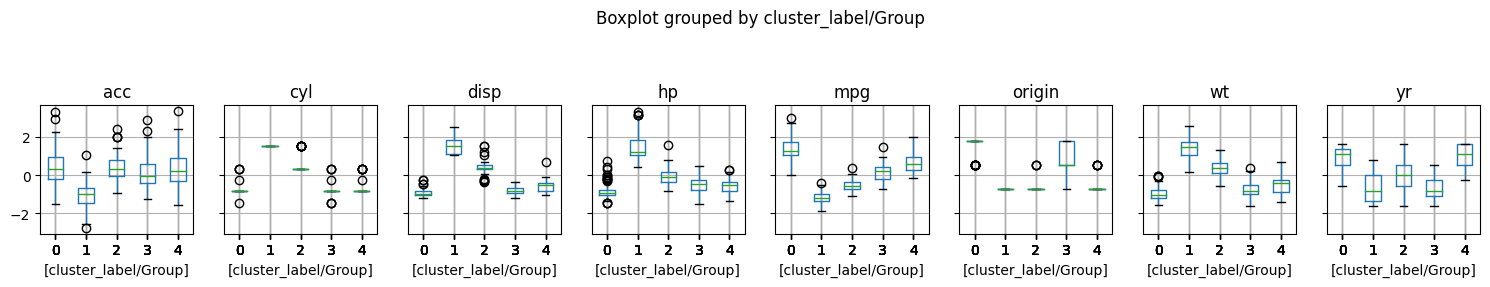

In [62]:
# scaled data
df_scaled.boxplot(by='cluster_label/Group', layout=(6,8), figsize=(18,12));

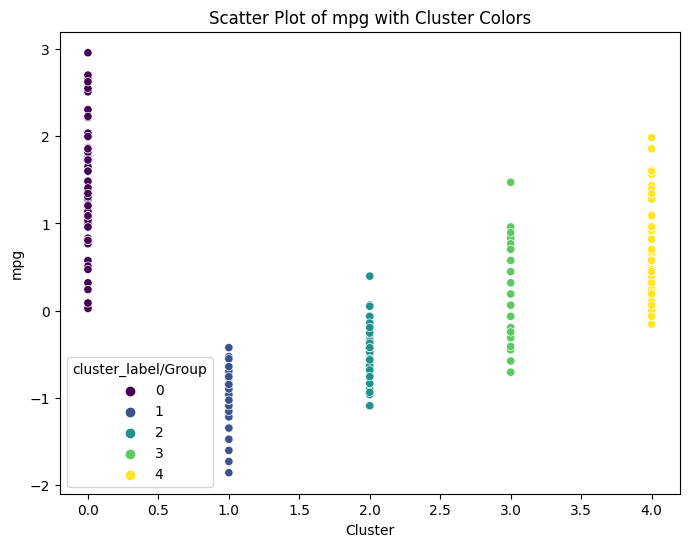

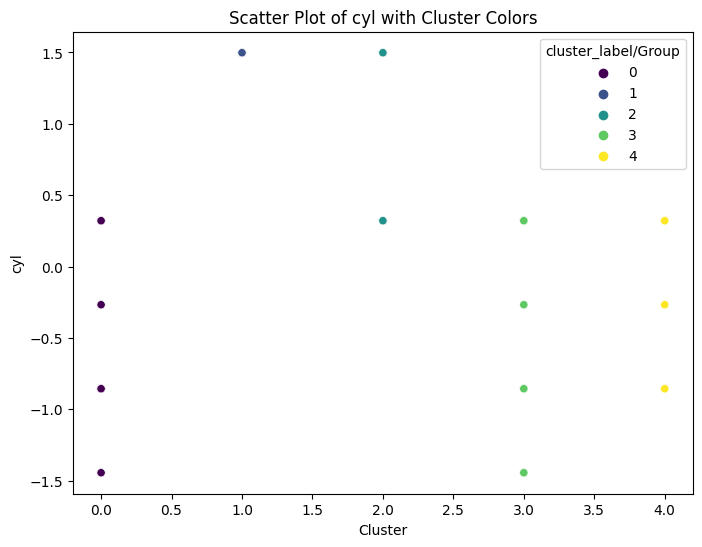

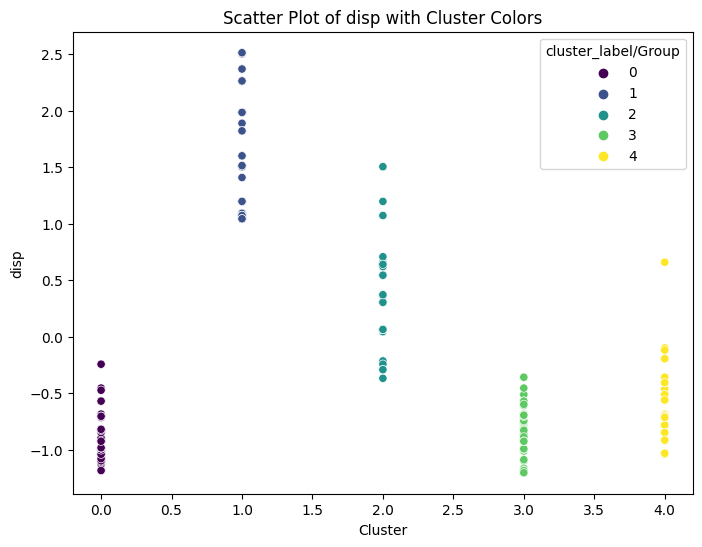

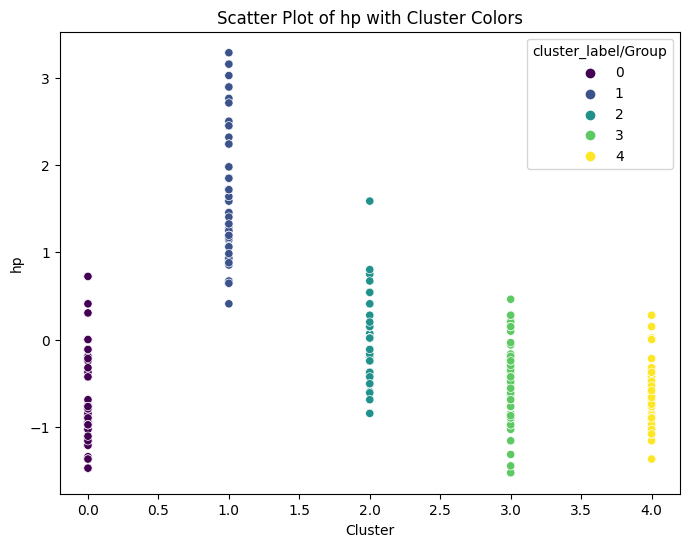

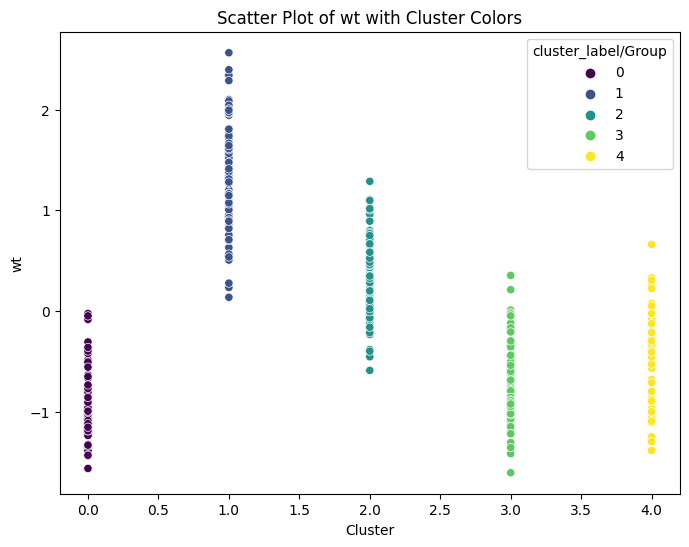

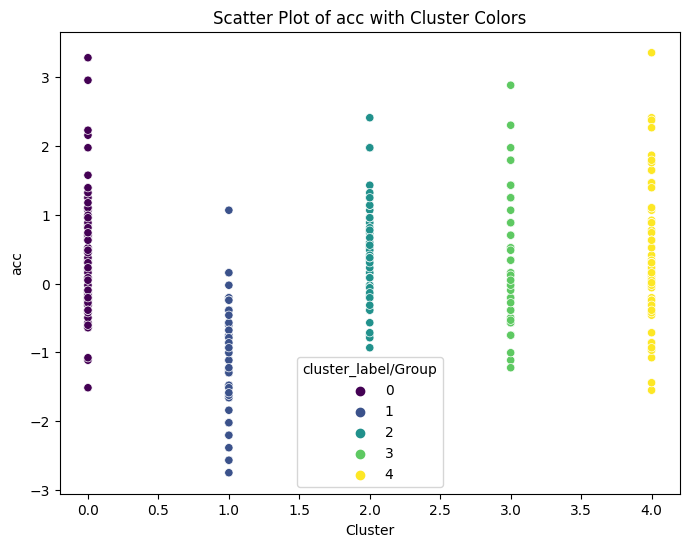

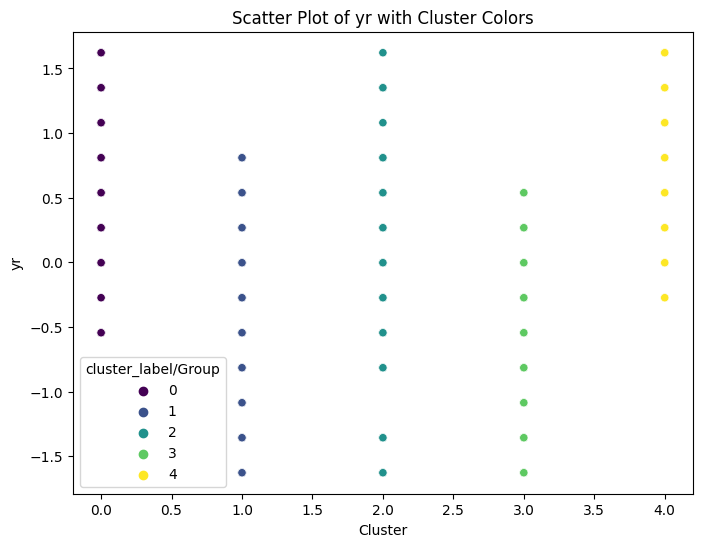

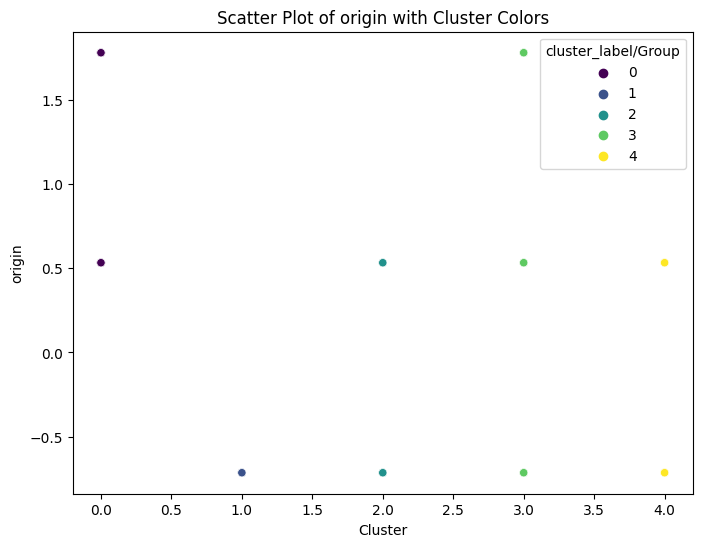

In [63]:
# scatter plot
cols =df_scaled.drop(['cluster_label/Group'], axis=1) 
cols = cols.columns
for i in cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_scaled, x='cluster_label/Group', y=i, hue='cluster_label/Group', palette='viridis')
    plt.title(f'Scatter Plot of {i} with Cluster Colors')
    plt.xlabel('Cluster')
    plt.ylabel(i)
    plt.show()

G. Pass a new DataPoint and predict which cluster it belongs to.

In [64]:
# New data point
new_data_point = pd.DataFrame({
    'mpg': [23],
    'cyl': [4],
    'disp': [193],
    'hp': [104],
    'wt': [2970],
    'acc': [16],
    'yr': [76],
    'origin': [1]
})


# prediction
pred = final_kmeans_model.predict(new_data_point)
print(f'The new DataaPoiint belongs to {pred} cluster or group')

The new DataaPoiint belongs to [1] cluster or group


Part B

1. Data Understanding & Cleaning:

A. Read ‘vehicle.csv’ and save as DataFrame.

In [65]:
df_vehicle = pd.read_csv('vehicle.csv')

In [66]:
df_vehicle.shape

(846, 19)

In [67]:
df_vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [68]:
df_vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

B. Check percentage of missing values and impute with correct approach.

In [69]:
(df_vehicle.isnull().sum() / len(df_merged)) * 100

compactness                    0.000000
circularity                    1.256281
distance_circularity           1.005025
radius_ratio                   1.507538
pr.axis_aspect_ratio           0.502513
max.length_aspect_ratio        0.000000
scatter_ratio                  0.251256
elongatedness                  0.251256
pr.axis_rectangularity         0.753769
max.length_rectangularity      0.000000
scaled_variance                0.753769
scaled_variance.1              0.502513
scaled_radius_of_gyration      0.502513
scaled_radius_of_gyration.1    1.005025
skewness_about                 1.507538
skewness_about.1               0.251256
skewness_about.2               0.251256
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

We could impute the missing values with the mean or median of the respective columns, but as the percentage of missing values is relatively small, we could drop rows with missing values.

In [70]:
# dropping the rows with missing values
df_vehicle.dropna(inplace=True)
df_vehicle.shape

(813, 19)

C. Visualize a Pie-chart and print percentage of values for variable ‘class’.

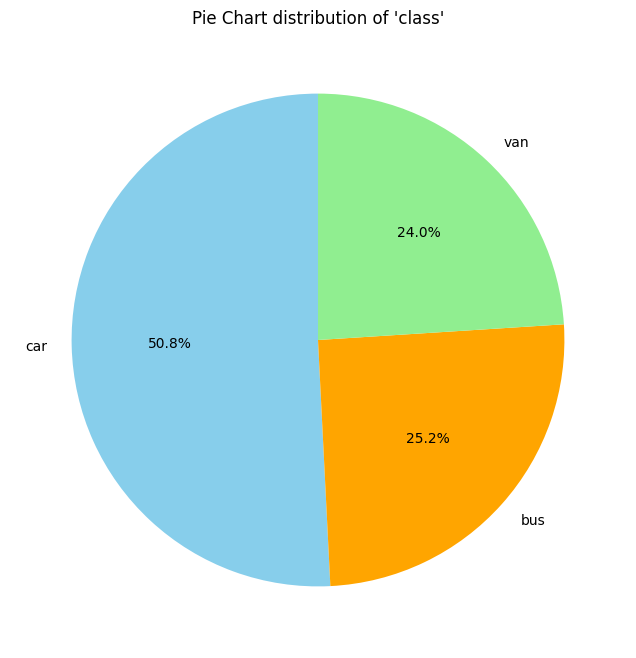

In [71]:
class_distribution = df_vehicle['class'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen'])
plt.title("Pie Chart distribution of 'class'")
plt.show()

In [72]:
percentage = (class_distribution / len(df_vehicle)) * 100
print("Percentage of values for variable 'class' is :\n", percentage)

Percentage of values for variable 'class' is :
 class
car    50.799508
bus    25.215252
van    23.985240
Name: count, dtype: float64


D. Check for duplicate rows in the data and impute with correct approach.

In [73]:
df_vehicle.duplicated().value_counts()

False    813
Name: count, dtype: int64

There are no duplicate rows present in the data.

In [74]:
print("Number of duplicate rows present in the data are :", df_vehicle.duplicated().sum())


Number of duplicate rows present in the data are : 0


2. Data Preparation: [2 Marks]

A. Split data into X and Y. [Train and Test optional]

In [75]:
X = df_vehicle.drop(['class'], axis=1)
y = df_vehicle['class']

B. Standardize the Data.

In [82]:
X_scaled = X.apply(zscore)
X_scaled

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.079822,-0.944703,0.314261,0.413803,0.279250,-0.128151,0.013207,-0.126809,-0.217151,-0.958335,0.373150,-0.093528,-0.781504,-0.053505,0.131793,1.380091,-0.159204,-0.098644
842,-0.565926,0.194828,0.124067,-0.181529,0.530251,0.513657,-0.289256,0.257876,-0.217151,0.766312,-0.493716,-0.401813,0.054092,-0.053505,-1.088104,0.819644,-0.484413,0.171837
843,1.500018,1.497149,1.201833,1.574700,0.655752,0.727593,1.616264,-1.409094,1.727163,1.732113,1.272121,1.613458,0.796844,-0.321192,-0.681472,-0.973784,-0.321809,0.712800
844,-0.930504,-1.433074,-0.256321,-0.687560,-0.473753,-0.342087,-1.015169,1.155476,-0.994877,-1.648193,-1.071626,-0.961293,-0.812452,-0.856567,-1.291420,1.380091,0.166004,-0.098644


3. Model Building:

A. Train a base Classification model using SVM.

In [100]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

In [101]:
# SVM model
SVM_model = svm.SVC(random_state=1) # using the default values c=1 and gamma = scale
SVM_model.fit(X_train, y_train)

SVC(random_state=1)

In [102]:
# PREDICTION
y_pred = SVM_model.predict(X_test)
y_pred

array(['bus', 'van', 'van', 'van', 'car', 'car', 'bus', 'car', 'van',
       'van', 'car', 'van', 'car', 'bus', 'car', 'car', 'car', 'car',
       'bus', 'bus', 'bus', 'van', 'car', 'car', 'van', 'car', 'bus',
       'car', 'bus', 'car', 'car', 'car', 'bus', 'van', 'car', 'car',
       'bus', 'car', 'car', 'car', 'car', 'van', 'car', 'car', 'van',
       'van', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'van',
       'car', 'bus', 'car', 'car', 'van', 'car', 'van', 'car', 'van',
       'van', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'van', 'car',
       'bus', 'bus', 'bus', 'car', 'bus', 'bus', 'bus', 'van', 'van',
       'van', 'van', 'car', 'car', 'van', 'van', 'van', 'van', 'car',
       'bus', 'van', 'bus', 'car', 'car', 'van', 'bus', 'car', 'van',
       'bus', 'bus', 'car', 'bus', 'bus', 'van', 'car', 'car', 'bus',
       'van', 'car', 'bus', 'car', 'car', 'car', 'car', 'van', 'car',
       'van', 'car', 'bus', 'bus', 'bus', 'van', 'van', 'bus', 'van',
       'car', 'car',

In [103]:
y_pred_train = SVM_model.predict(X_train)

B. Print Classification metrics for train data.

In [104]:
# training score
SVM_model.score(X_train, y_train)

0.9815384615384616

In [105]:
# testing score 
SVM_model.score(X_test, y_test)

0.9570552147239264

Model is performing well on the data.

In [106]:
# classification report 
print('Classification report for train: \n',classification_report(y_train, y_pred_train))
print("")
print('Classification report for test: \n',classification_report(y_test, y_pred))

Classification report for train: 
               precision    recall  f1-score   support

         bus       0.98      0.99      0.98       164
         car       1.00      0.97      0.98       330
         van       0.95      0.99      0.97       156

    accuracy                           0.98       650
   macro avg       0.98      0.98      0.98       650
weighted avg       0.98      0.98      0.98       650


Classification report for test: 
               precision    recall  f1-score   support

         bus       1.00      0.95      0.97        41
         car       1.00      0.94      0.97        83
         van       0.85      1.00      0.92        39

    accuracy                           0.96       163
   macro avg       0.95      0.96      0.95       163
weighted avg       0.96      0.96      0.96       163



C. Apply PCA on the data with 10 components.

In [109]:
pca = PCA(n_components=10, random_state=1)
pca.fit(X_scaled)

PCA(n_components=10, random_state=1)

D. Visualize Cumulative Variance Explained with Number of Components.

In [110]:
# The eigen Values
print(pca.explained_variance_)

[9.453387   2.98961888 1.91768721 1.17011696 0.92909452 0.5321711
 0.35907377 0.22236083 0.15609314 0.09281912]


In [115]:
# percentage of variation explained by each eigen Vector/component
print(pca.explained_variance_ratio_)

[0.52454218 0.16588564 0.10640714 0.06492654 0.05155287 0.0295287
 0.01992401 0.01233818 0.00866117 0.00515028]


In [117]:
#Cumulative Explained Variance
print(sum(pca.explained_variance_ratio_))

0.9889167071179527


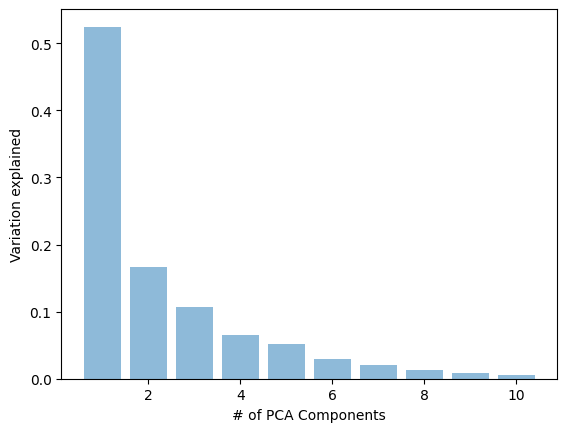

In [118]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('# of PCA Components')
plt.show()

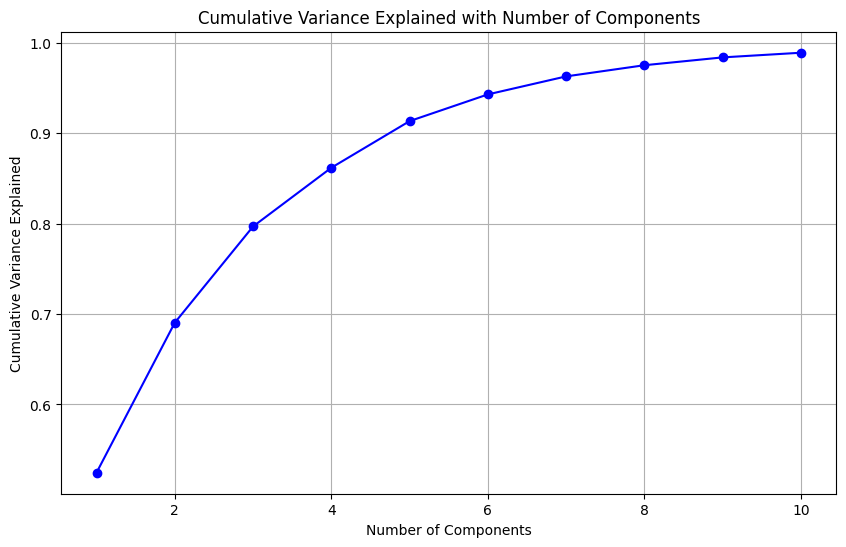

In [119]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Variance Explained with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

E. Draw a horizontal line on the above plot to highlight the threshold of 90%.

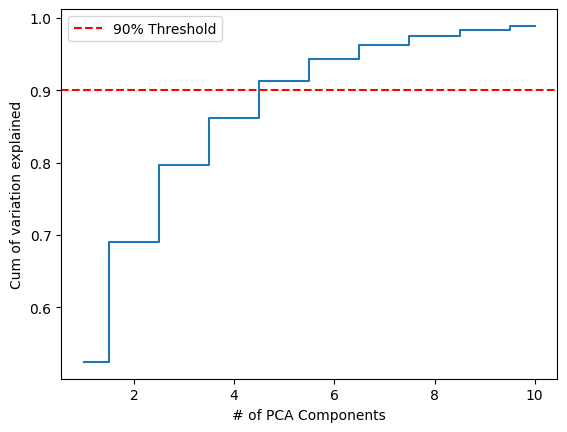

In [121]:
plt.step(list(range(1, 11)), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.legend()
plt.show()

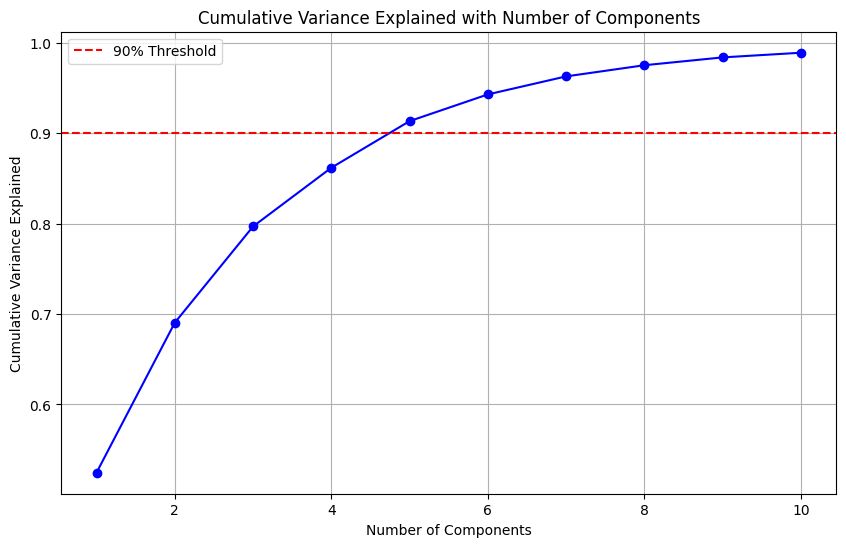

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.title('Cumulative Variance Explained with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [124]:
# minimum number of components for 90% variance explained
min_components = np.argmax(cumulative_variance >= 0.9) + 1
print("Minimum Number of Components for 90% Variance Explained:", min_components)

#  applying PCA 
pca_selected = PCA(n_components=min_components, random_state=1)
pca_selected.fit(X_scaled)

Minimum Number of Components for 90% Variance Explained: 5


PCA(n_components=5, random_state=1)

In [125]:
# The eigen Values
print(pca_selected.explained_variance_)

[9.453387   2.98961888 1.91768721 1.17011696 0.92909452]


In [126]:
# percentage of variation explained by each eigen Vector/component
print(pca_selected.explained_variance_ratio_)

[0.52454218 0.16588564 0.10640714 0.06492654 0.05155287]


In [127]:
#Cumulative Explained Variance
print(sum(pca_selected.explained_variance_ratio_))

0.9133143712515759


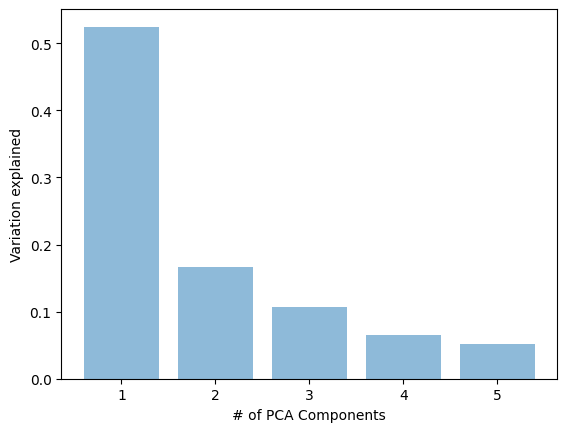

In [128]:
plt.bar(list(range(1,6)),pca_selected.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('# of PCA Components')
plt.show()

G. Train SVM model on components selected from above step.

In [130]:
# transorming the train data

X_train_pca_selected = pca_selected.transform(X_train)
X_test_pca_selected = pca_selected.transform(X_test)
print(X_train_pca_selected.shape)
print(X_test_pca_selected.shape)

(650, 5)
(163, 5)


In [132]:
# SVM model
SVM_model = svm.SVC(random_state=1) # again using the default values c=1 and gamma = scale
SVM_model.fit(X_train_pca_selected, y_train)

SVC(random_state=1)

In [134]:
# PREDICTIONS
y_pred_train = SVM_model.predict(X_train_pca_selected)
y_pred = SVM_model.predict(X_test_pca_selected)
y_pred

array(['bus', 'van', 'van', 'bus', 'car', 'car', 'car', 'car', 'car',
       'van', 'car', 'van', 'car', 'bus', 'car', 'car', 'bus', 'bus',
       'bus', 'van', 'bus', 'van', 'car', 'car', 'van', 'car', 'bus',
       'car', 'bus', 'car', 'car', 'car', 'bus', 'van', 'car', 'car',
       'van', 'car', 'car', 'car', 'van', 'van', 'car', 'car', 'van',
       'van', 'car', 'van', 'car', 'car', 'car', 'car', 'van', 'van',
       'car', 'van', 'car', 'car', 'van', 'car', 'bus', 'car', 'van',
       'car', 'bus', 'car', 'car', 'car', 'car', 'van', 'car', 'van',
       'bus', 'bus', 'car', 'bus', 'bus', 'bus', 'car', 'van', 'van',
       'car', 'van', 'car', 'car', 'bus', 'van', 'van', 'van', 'car',
       'bus', 'van', 'bus', 'car', 'car', 'van', 'bus', 'car', 'van',
       'bus', 'bus', 'car', 'car', 'bus', 'car', 'car', 'car', 'bus',
       'van', 'car', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'car', 'car', 'bus', 'bus', 'van', 'bus', 'van', 'van',
       'car', 'car',

H. Print Classification metrics for train data of above model and share insights.

In [135]:
# training score
SVM_model.score(X_train_pca_selected, y_train)

0.7907692307692308

In [136]:
# testing score 
SVM_model.score(X_test_pca_selected, y_test)

0.7914110429447853

Although the scores has been dropped but there is almost no difference between tarining and testing score

In [137]:
# classification report 
print('Classification report for train: \n',classification_report(y_train, y_pred_train))
print("")
print('Classification report for test: \n',classification_report(y_test, y_pred))

Classification report for train: 
               precision    recall  f1-score   support

         bus       0.79      0.71      0.75       164
         car       0.85      0.88      0.86       330
         van       0.66      0.69      0.68       156

    accuracy                           0.79       650
   macro avg       0.77      0.76      0.76       650
weighted avg       0.79      0.79      0.79       650


Classification report for test: 
               precision    recall  f1-score   support

         bus       0.75      0.66      0.70        41
         car       0.85      0.89      0.87        83
         van       0.70      0.72      0.71        39

    accuracy                           0.79       163
   macro avg       0.77      0.76      0.76       163
weighted avg       0.79      0.79      0.79       163



4. Performance Improvement:

A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [143]:
# using Grid Search to find the best combination of hyperparameters.

svm_model = svm.SVC(random_state=1) # svm model

# parameters grid for Grid Search
param_grid = {
    'C': [0.1, 0.25, 1, 5, 10, 50, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient for 'rbf'
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# training the data
grid_search.fit(X_train_pca_selected, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.1, 0.25, 1, 5, 10, 50, 100],
                         'gamma': ['scale', 'auto', 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [144]:
# PREDICTIONs
y_pred_train_tuned = grid_search.predict(X_train_pca_selected)
y_test_pred_tuned = grid_search.predict(X_test_pca_selected)
y_test_pred_tuned

array(['bus', 'car', 'van', 'bus', 'car', 'car', 'car', 'car', 'van',
       'van', 'car', 'van', 'car', 'bus', 'bus', 'car', 'bus', 'van',
       'bus', 'bus', 'bus', 'van', 'car', 'car', 'van', 'car', 'bus',
       'car', 'bus', 'car', 'car', 'car', 'bus', 'van', 'car', 'car',
       'bus', 'car', 'car', 'car', 'van', 'van', 'car', 'car', 'van',
       'van', 'car', 'van', 'car', 'car', 'van', 'car', 'van', 'van',
       'car', 'van', 'car', 'car', 'van', 'car', 'bus', 'car', 'van',
       'van', 'bus', 'car', 'car', 'car', 'car', 'car', 'car', 'bus',
       'bus', 'van', 'bus', 'bus', 'bus', 'bus', 'car', 'van', 'van',
       'car', 'van', 'car', 'car', 'van', 'van', 'van', 'van', 'car',
       'bus', 'van', 'bus', 'car', 'car', 'van', 'bus', 'car', 'van',
       'bus', 'bus', 'car', 'car', 'bus', 'car', 'car', 'car', 'bus',
       'van', 'car', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'car', 'car', 'bus', 'bus', 'van', 'van', 'bus', 'van',
       'car', 'car',

B. Share best Parameters observed from above step.

In [145]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with
insights.

In [146]:
# training score
grid_search.score(X_train_pca_selected, y_train)

0.9061538461538462

In [147]:
# testing score 
grid_search.score(X_test_pca_selected, y_test)

0.8220858895705522

In [148]:
# classification report 
print('Classification report for train: \n',classification_report(y_train, y_pred_train_tuned))
print("")
print('Classification report for test: \n',classification_report(y_test, y_test_pred_tuned))

Classification report for train: 
               precision    recall  f1-score   support

         bus       0.88      0.88      0.88       164
         car       0.93      0.95      0.94       330
         van       0.87      0.84      0.86       156

    accuracy                           0.91       650
   macro avg       0.90      0.89      0.89       650
weighted avg       0.91      0.91      0.91       650


Classification report for test: 
               precision    recall  f1-score   support

         bus       0.79      0.76      0.77        41
         car       0.88      0.86      0.87        83
         van       0.74      0.82      0.78        39

    accuracy                           0.82       163
   macro avg       0.81      0.81      0.81       163
weighted avg       0.82      0.82      0.82       163



Insights:
    
    - Original Model Testing Accuracy: 79%
    - Tuned Model Testing Accuracy: 82%
    - Precision, recall, and F1-score have improved slightly for all classes in the tuned model.
    - The tuned model maintains or slightly improves performance on both the training and test sets, indicating that hyperparameter tuning did not lead to overfitting.
    - While the accuracy did not experience a significant increase, the model's stability and balanced improvements across metrics suggest that the tuning process was beneficial.

5. Data Understanding & Cleaning:

A. Explain pre-requisite/assumptions of PCA.

1. PCA assumes that the relationships among variables are linear. 
2. PCA is sensitive to the scale of the features. It assumes that all variables are measured in comparable units.This is why it’s so important to standardize the values first.
3. PCA tends to perform better with a large sample size. Asymptotic results show that the eigenvalues and eigenvectors derived from PCA become more stable as the sample size increases.
4. PCA assumes that the principal components capture linear relationships among variables. 
5. PCA is not robust against outliers. This is why it is recommended to handle outliers appropriately before performing PCA.

B. Explain advantages and limitations of PCA.

Advantages:

    - PCA is primarily used for dimensionality reduction by transforming a high-dimensional dataset into a lower-dimensional one while retaining the most important information. The new features are created by linear combinations od the oldd fatures.
    - PCA extracts the underlying structure in the data by identifying patterns and relationships among variables. It helps in capturing the essence of the data with a smaller set of uncorrelated variables known as principal components.
    -  PCA can be used as a preprocessing step to improve the performance of models by removing irrelevant features and reducing the risk of overfitting.
    - PCA simplifies the computational complexity of working with high-dimensional data. Analyzing and modeling data in a lower-dimensional space is computationally more efficient than dealing with a large number of original features.

Limitations:

    - PCA assumes linear relationships among variables. If the underlying relationships are nonlinear, PCA may not capture the most relevant information.
    - PCA is sensitive to outliers. Outliers can influence the principal components.
    - While PCA simplifies data representation, the interpretability of the principal components may be challenging. Understanding the physical or biological meaning of the components can be complex, especially in cases with a large number of original variables.
    - Determining the optimal number of principal components to retain is a subjective process. 